In [1]:
# =========================================================
# Notebook 00 - Preview Masks on Bone Age Dataset
# =========================================================

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# ---------------------------------------------------------
# PATHS
# ---------------------------------------------------------
BASE_DIR = Path("/home/fabrice/Boneage")

IMG_DIR = BASE_DIR / "boneage-training-dataset" / "boneage-training-dataset"
MASK_DIR = BASE_DIR / "eff_unet"

print("Images:", IMG_DIR)
print("Masks :", MASK_DIR)

# ---------------------------------------------------------
# LISTE DES FICHIERS
# ---------------------------------------------------------
all_images = sorted([f for f in os.listdir(IMG_DIR) if f.endswith(".png")])
print(f"Nombre total d'images trouvées: {len(all_images)}")

# On limite à 10 images pour vérification
sample_images = all_images[:10]
sample_images


Images: /home/fabrice/Boneage/boneage-training-dataset/boneage-training-dataset
Masks : /home/fabrice/Boneage/eff_unet
Nombre total d'images trouvées: 12611


['10000.png',
 '10001.png',
 '10002.png',
 '10003.png',
 '10004.png',
 '10005.png',
 '10006.png',
 '10007.png',
 '10008.png',
 '10009.png']

In [2]:
# ---------------------------------------------------------
# FONCTION UTILITAIRE
# ---------------------------------------------------------

def load_image(path):
    """Charge une image grayscale."""
    img = cv2.imread(str(path), cv2.IMREAD_GRAYSCALE)
    return img

def load_mask(path):
    """Charge un masque et le binarise entre 0 et 1."""
    mask = cv2.imread(str(path), cv2.IMREAD_GRAYSCALE)
    if mask is None:
        return None

    # Certains masques peuvent être en niveaux gris → on binarise
    _, mask_bin = cv2.threshold(mask, 1, 1, cv2.THRESH_BINARY)
    return mask_bin

def apply_mask(image, mask):
    """Retourne image masquée."""
    masked = image * mask
    return masked


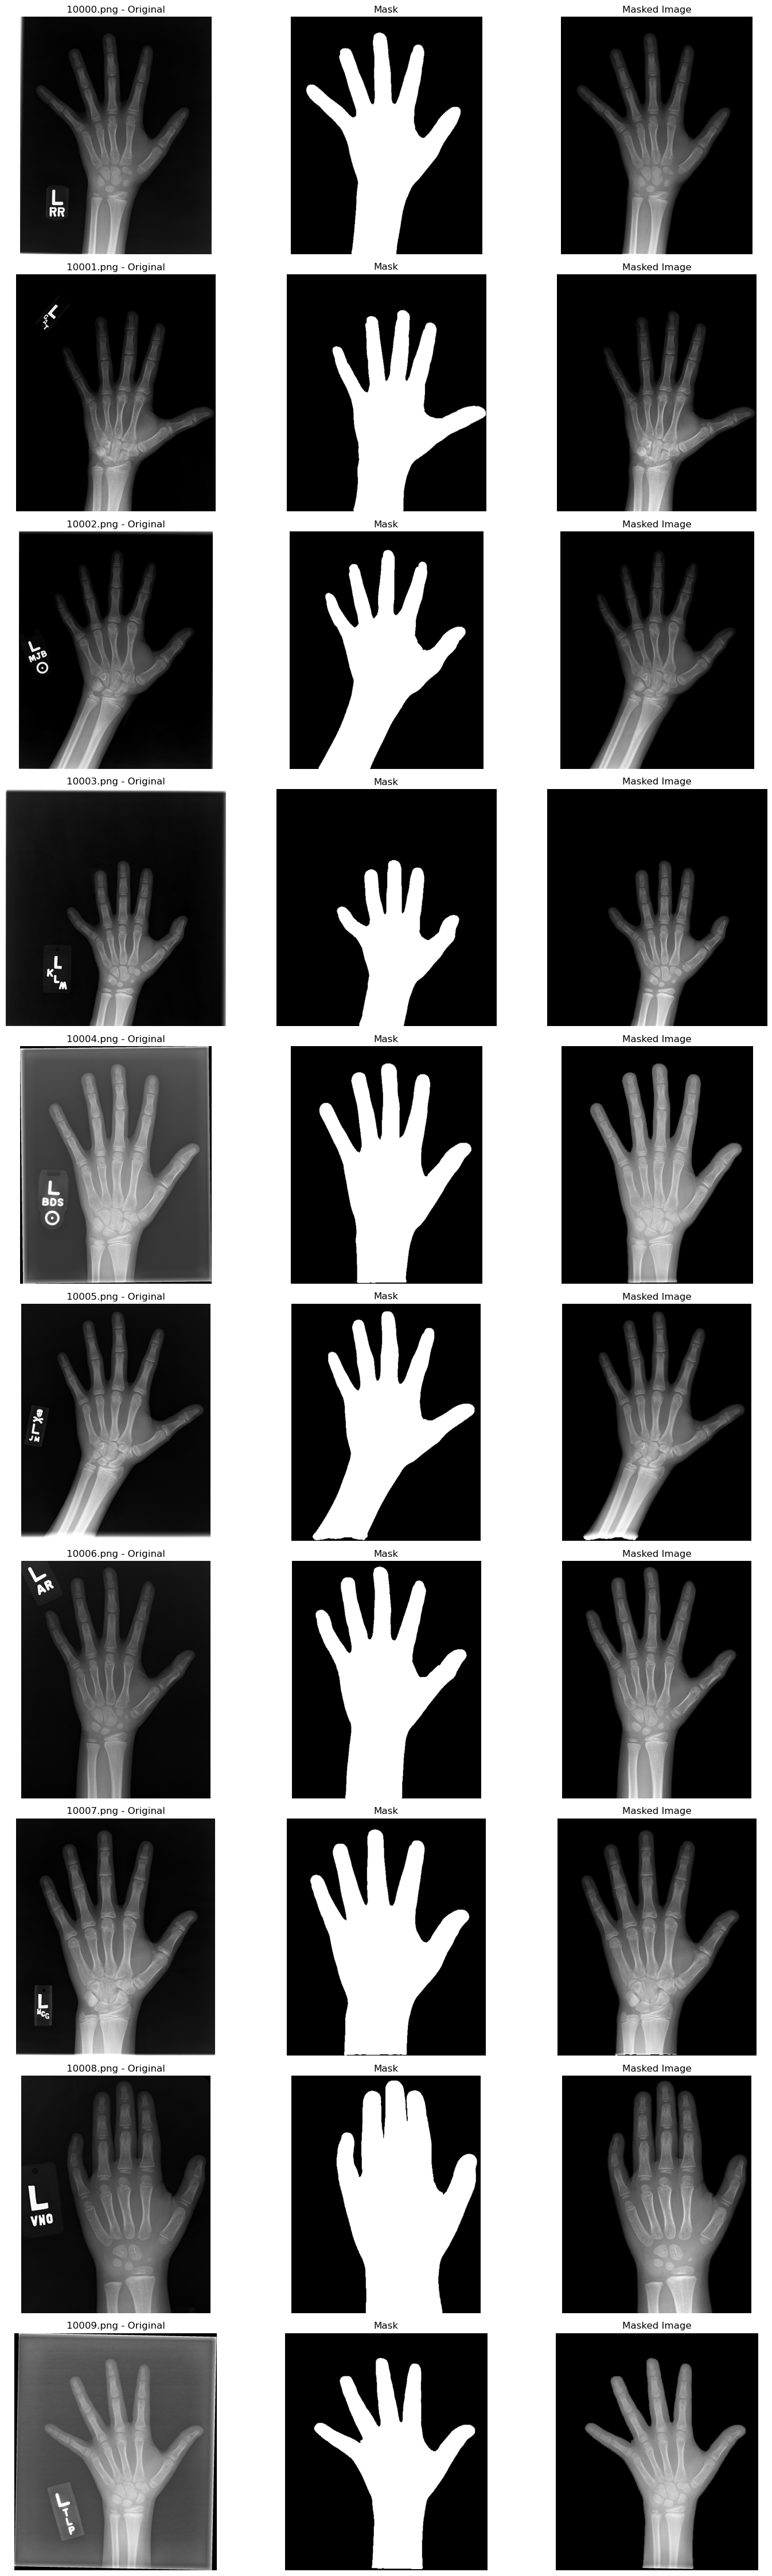

In [3]:
# ---------------------------------------------------------
# AFFICHAGE POUR 10 IMAGES
# ---------------------------------------------------------

plt.figure(figsize=(15, 45))

for idx, filename in enumerate(sample_images):
    
    img_path = IMG_DIR / filename
    mask_path = MASK_DIR / filename  # masque avec même nom
    
    img = load_image(img_path)
    mask = load_mask(mask_path)

    if mask is None:
        print(f"⚠ Aucun masque trouvé pour {filename}")
        continue

    masked = apply_mask(img, mask)

    # ----- Plot -----
    plt.subplot(len(sample_images), 3, idx*3 + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"{filename} - Original")
    plt.axis("off")

    plt.subplot(len(sample_images), 3, idx*3 + 2)
    plt.imshow(mask, cmap="gray")
    plt.title("Mask")
    plt.axis("off")

    plt.subplot(len(sample_images), 3, idx*3 + 3)
    plt.imshow(masked, cmap="gray")
    plt.title("Masked Image")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [4]:
# vérifier que chaque image possède un masque correspondant

from pathlib import Path
import os

BASE_DIR = Path("/home/fabrice/Boneage")

IMG_DIR = BASE_DIR / "boneage-training-dataset" / "boneage-training-dataset"
MASK_DIR = BASE_DIR / "eff_unet"

# Liste des images
images = sorted([f for f in os.listdir(IMG_DIR) if f.endswith(".png")])

# Liste des masques
masks = set([f for f in os.listdir(MASK_DIR) if f.endswith(".png")])

missing_masks = []

for img in images:
    if img not in masks:
        missing_masks.append(img)

print(f"Total images trouvées : {len(images)}")
print("-" * 40)

if len(missing_masks) == 0:
    print(" Chaque image a un masque correspondant. Parfait.")
else:
    print(f" {len(missing_masks)} images n'ont PAS de masque correspondant :")
    for f in missing_masks[:20]:
        print(" -", f)
    if len(missing_masks) > 20:
        print(f"... ({len(missing_masks) - 20} autres)")


Total images trouvées : 12611
----------------------------------------
 23 images n'ont PAS de masque correspondant :
 - 1378.png
 - 1398.png
 - 1402.png
 - 1418.png
 - 1429.png
 - 1445.png
 - 1494.png
 - 1497.png
 - 1541.png
 - 1559.png
 - 1779.png
 - 1826.png
 - 2133.png
 - 2202.png
 - 2327.png
 - 3100.png
 - 3899.png
 - 3905.png
 - 3931.png
 - 3964.png
... (3 autres)


In [5]:
# quelles images du csv nettoye n'ont pas de masque ?

import pandas as pd
from pathlib import Path
import os

# -------------------------------
# PATHS
# -------------------------------
BASE_DIR = Path("/home/fabrice/Boneage")

CSV_PATH = BASE_DIR / "boneage-training-dataset-cleaned.csv"
MASK_DIR = BASE_DIR / "eff_unet"

# -------------------------------
# CHARGER LE CSV
# -------------------------------
df = pd.read_csv(CSV_PATH)

# La colonne utile est "id"
ids = df["id"].astype(str).tolist()

# On convertit en noms de fichiers
csv_filenames = [f"{img_id}.png" for img_id in ids]

# -------------------------------
# LISTER LES MASQUES DISPONIBLES
# -------------------------------
available_masks = set([f for f in os.listdir(MASK_DIR) if f.endswith(".png")])

# -------------------------------
# QUELLES IMAGES DU CSV N'ONT PAS DE MASQUE ?
# -------------------------------
missing_masks = [fname for fname in csv_filenames if fname not in available_masks]

# -------------------------------
# AFFICHAGE
# -------------------------------
print(f"Nombre d'images dans le CSV : {len(csv_filenames)}")
print("-" * 50)

if len(missing_masks) == 0:
    print("Toutes les images du CSV ont un masque correspondant.")
else:
    print(f" {len(missing_masks)} images du CSV n'ont PAS de masque :")
    for f in missing_masks[:30]:
        print(" -", f)
    if len(missing_masks) > 30:
        print(f"... ({len(missing_masks) - 30} autres)")


Nombre d'images dans le CSV : 11332
--------------------------------------------------
 7 images du CSV n'ont PAS de masque :
 - 1779.png
 - 1826.png
 - 2133.png
 - 2327.png
 - 3899.png
 - 3931.png
 - 4004.png


In [6]:


import pandas as pd
from pathlib import Path

BASE_DIR = Path("/home/fabrice/Boneage")
CSV_PATH = BASE_DIR / "boneage-training-dataset-cleaned.csv"

# -------------------------------
# 1. Lister ici les IDs sans masque
# -------------------------------
missing_ids = [1779, 1826, 2133, 2327, 3899, 3931, 4004]  

# -------------------------------
# 2. Charger le CSV
# -------------------------------
df = pd.read_csv(CSV_PATH)

print("Rows avant suppression :", len(df))

# -------------------------------
# 3. Supprimer les lignes dont id est dans la liste
# -------------------------------
df_cleaned = df[~df["id"].isin(missing_ids)]

print("Rows après suppression :", len(df_cleaned))

# -------------------------------
# 4. Sauvegarde du nouveau CSV
# -------------------------------
output_path = BASE_DIR / "boneage-training-dataset-cleaned-v3.csv"
df_cleaned.to_csv(output_path, index=False)

print("CSV nettoyé enregistré sous :", output_path)


Rows avant suppression : 11332
Rows après suppression : 11325
CSV nettoyé enregistré sous : /home/fabrice/Boneage/boneage-training-dataset-cleaned-v3.csv


In [7]:
# quelles images du csv nettoye n'ont pas de masque ?

import pandas as pd
from pathlib import Path
import os

# -------------------------------
# PATHS
# -------------------------------
BASE_DIR = Path("/home/fabrice/Boneage")

CSV_PATH = BASE_DIR / "boneage-training-dataset-cleaned-v3.csv"
MASK_DIR = BASE_DIR / "eff_unet"

# -------------------------------
# CHARGER LE CSV
# -------------------------------
df = pd.read_csv(CSV_PATH)

# La colonne utile est "id"
ids = df["id"].astype(str).tolist()

# On convertit en noms de fichiers
csv_filenames = [f"{img_id}.png" for img_id in ids]

# -------------------------------
# LISTER LES MASQUES DISPONIBLES
# -------------------------------
available_masks = set([f for f in os.listdir(MASK_DIR) if f.endswith(".png")])

# -------------------------------
# QUELLES IMAGES DU CSV N'ONT PAS DE MASQUE ?
# -------------------------------
missing_masks = [fname for fname in csv_filenames if fname not in available_masks]

# -------------------------------
# AFFICHAGE
# -------------------------------
print(f"Nombre d'images dans le CSV : {len(csv_filenames)}")
print("-" * 50)

if len(missing_masks) == 0:
    print("Toutes les images du CSV ont un masque correspondant.")
else:
    print(f" {len(missing_masks)} images du CSV n'ont PAS de masque :")
    for f in missing_masks[:30]:
        print(" -", f)
    if len(missing_masks) > 30:
        print(f"... ({len(missing_masks) - 30} autres)")

Nombre d'images dans le CSV : 11325
--------------------------------------------------
Toutes les images du CSV ont un masque correspondant.
